# Tutorial for Seis Cloud 101


This tutorial is a barebone seismological workflow to extract features from seismic data. The data can be queried using FDSN webservices and using S3 bucket from SCEDC open data sets.

In [1]:
import numpy as np
import obspy
from obspy.clients.fdsn import Client
client = Client("SCEDC")

We will download continuous data from a specific station and a specific date

In [2]:
net = "CI"
sta = "RIO"
chan = "HHZ"
loc ="*"
t0 = obspy.UTCDateTime("2022-01-01")
fmin = 0.1  # m
fmax = 10   # maximum frequency band

First, we download data from webservices (the old way)

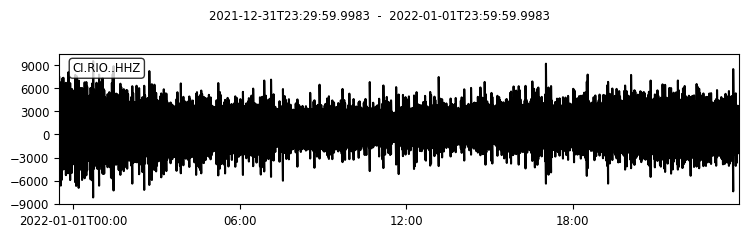

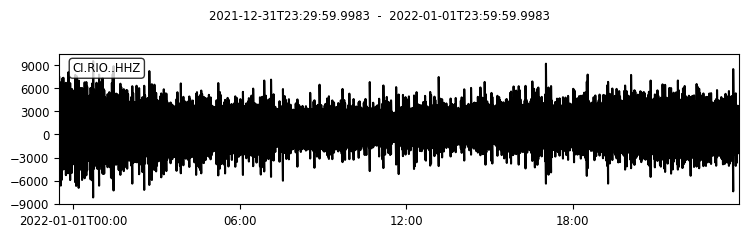

In [3]:
st=client.get_waveforms(network=net,station=sta,location=loc,channel=chan,\
                       starttime=t0-1800,endtime=t0+86400)
st.plot() 

Now we extract 2 kinds of feature: 
1. Peak amplitude at a specific frequency band
2. Peak frequency of the Fourier Amplitude Spectrum

We save the data into a CSV file that we will download.

In [ ]:
st.filter('bandpass',freqmin=fmin,freqmax=fmax)

# get the maximum value in that frequency band
Amax=np.max(np.abs(st[0].data))
imax = np.argmax(np.abs(st[0].data))
Amaxt = st[0].times()[imax]